# Fog Data

In [1]:
import requests
from xml.etree import ElementTree as ET

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import anderson
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
import os   

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## DATASET

In [2]:
raw_fog = pd.read_csv(f'C:/Users/USER/DATA WORK PLACE/2. DATA STUDY/6. WEATHER/data/fog_train.csv', encoding = 'euc-kr')
fog_test = pd.read_csv(f'C:/Users/USER/DATA WORK PLACE/2. DATA STUDY/6. WEATHER/data/fog_test.csv', encoding = 'euc-kr')

raw_fog

,Unnamed: 0,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
0,1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,3156455,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156455,3156456,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156456,3156457,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156457,3156458,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [3]:
raw_fog[raw_fog['fog_train.class'] < -90]

,Unnamed: 0,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
7645,7646,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,-99,-99
7780,7781,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,-99,-99
16053,16054,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,-99,-99
16054,16055,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,-99,-99
16055,16056,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155926,3155927,K,12,28,7,10,EC,307.9,4.3,2.0,0.0,62.6,0.00,-1.4,-99,-99
3155961,3155962,K,12,28,13,0,EC,294.5,6.1,6.7,0.0,41.3,0.32,15.2,-99,-99
3156100,3156101,K,12,29,12,10,EC,16.3,3.5,4.7,0.0,43.2,0.34,14.6,-99,-99
3156135,3156136,K,12,29,18,0,EC,314.4,8.8,3.5,0.0,42.0,0.00,1.6,-99,-99


In [4]:
def raw_data_preprocessing_train(dataset):

    fog_data = dataset.copy()

    fog_data = fog_data.drop(['Unnamed: 0'], axis = 1)

    fog_data = fog_data.replace(-99.00, np.NaN)
    fog_data = fog_data.replace(-99.90, np.NaN)

    columns = fog_data.columns
    columns = [column.replace('fog_train.', "") for column in columns]
    fog_data.columns = columns
    fog_data = fog_data.drop(['vis1'], axis = 1)

    return fog_data

def raw_data_preprocessing_test(dataset):

    fog_data = dataset.copy()

    fog_data = fog_data.replace(-99.00, np.NaN)
    fog_data = fog_data.replace(-99.90, np.NaN)

    fog_data = fog_data.drop(['Unnamed: 0'], axis = 1)

    columns = fog_data.columns
    columns = [column.replace('fog_test.', "") for column in columns]
    fog_data.columns = columns
    fog_data = fog_data.drop(['class'], axis = 1)

    return fog_data

In [5]:
fog_data = raw_data_preprocessing_train(raw_fog)

fog_data = fog_data.drop(['year', 'month', 'day', 'time', 'minute'], axis = 1)

fog_test = raw_data_preprocessing_test(fog_test)

fog_test = fog_test.drop(['year', 'month', 'day', 'time', 'minute'], axis = 1)

fog_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
0,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4.0
1,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4.0
2,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4.0
3,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4.0
4,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4.0
...,...,...,...,...,...,...,...,...,...
3156454,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4.0
3156455,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4.0
3156456,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4.0
3156457,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4.0


In [6]:
fog_test

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts
0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6
1,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6
2,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7
3,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6
4,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6
...,...,...,...,...,...,...,...,...
262795,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9
262796,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9
262797,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8
262798,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4


In [7]:
def labelencoding_for_territory(dataset):

    stn_list = dataset['stn_id'].str[0]

    dataset['stn_id'] = stn_list

    stn_encoding_df = pd.DataFrame({
        'stn_id' : ['A', 'B', 'C', 'D', 'E'],
        'stn_num' : [1, 2, 3, 4, 5]
    })

    stn_encoding_map = stn_encoding_df.set_index('stn_id')['stn_num'].to_dict()
    # df를 series로 만든 후 dict형태로 변환하기
    dataset['stn_id'] = dataset['stn_id'].map(stn_encoding_map)
    return dataset

In [8]:
fog_data = labelencoding_for_territory(fog_data)
fog_test = labelencoding_for_territory(fog_test)

In [9]:
fog_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
0,1,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4.0
1,1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4.0
2,1,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4.0
3,1,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4.0
4,1,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4.0
...,...,...,...,...,...,...,...,...,...
3156454,5,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4.0
3156455,5,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4.0
3156456,5,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4.0
3156457,5,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4.0


In [10]:
fog_test

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts
0,1,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6
1,1,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6
2,1,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7
3,1,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6
4,1,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6
...,...,...,...,...,...,...,...,...
262795,5,338.8,6.1,4.5,0.0,71.3,0.0,1.9
262796,5,335.2,5.8,4.6,0.0,71.4,0.0,1.9
262797,5,337.1,5.3,4.5,0.0,72.1,0.0,1.8
262798,5,322.0,3.7,4.3,0.0,72.5,0.0,1.4


# CLASSIFICATION

In [11]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

### DATA preprocessing

#### basic

In [12]:
model_data = fog_data.copy()
model_data = model_data.dropna()
test_data = fog_test.copy()
test_data = test_data.dropna()
model_data

,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class
0,1,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4.0
1,1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4.0
2,1,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4.0
3,1,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4.0
4,1,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4.0
...,...,...,...,...,...,...,...,...,...
3156454,5,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4.0
3156455,5,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4.0
3156456,5,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4.0
3156457,5,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4.0


#### split

In [13]:
dataset_preprocessed = model_data.copy()
x_test = test_data.copy()

x = dataset_preprocessed.drop(['class'], axis = 1)
y = dataset_preprocessed['class']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size= 0.75, random_state=42)
# stratify는 데이터 클래스의 비율을 일정한 수준으로 유지한채 데이터를 스플릿하는 함수임

- class별 비율

In [14]:
def class_info(dataset, msg = ""):
    try:

        unique_values, counts = np.unique(dataset['class'], return_counts = True)
        
        print("[ " + msg + "의 class별 count / ratio ]")
        print("-"*40)
        for value, count in zip(unique_values, counts):
            print('class ' + f'{int(value)}: {count}' + " / " + str(round(count/len(dataset['class'])*100, 2)) + "%")
        
        print("-"*40)
        fog_count = len(dataset[dataset['class'] < 4]['class'])
        print("안개 : " + str(fog_count) + " / " + str(round(fog_count/len(dataset['class'])*100, 2)) + "%")

    except:

        unique_values, counts = np.unique(dataset, return_counts = True)
        
        print("[ " + msg + "의 class별 count / ratio ]")
        print("-"*40)
        for value, count in zip(unique_values, counts):
            print('class ' + f'{int(value)}: {count}' + " / " + str(round(count/len(dataset)*100, 2)) + "%")
        
        print("-"*40)
        fog_count = len(dataset[dataset < 4])
        print("안개 : " + str(fog_count) + " / " + str(round(fog_count/len(dataset)*100, 2)) + "%")
        

In [15]:
class_info(model_data, "전체 trainset")

[ 전체 trainset의 class별 count / ratio ]
----------------------------------------
class 1: 7806 / 0.26%
class 2: 11975 / 0.4%
class 3: 11940 / 0.4%
class 4: 2963129 / 98.94%
----------------------------------------
안개 : 31721 / 1.06%


In [16]:
class_info(y_train, "splited trainset")

[ splited trainset의 class별 count / ratio ]
----------------------------------------
class 1: 5885 / 0.26%
class 2: 8971 / 0.4%
class 3: 8916 / 0.4%
class 4: 2222365 / 98.94%
----------------------------------------
안개 : 23772 / 1.06%


In [17]:
class_info(y_valid, "splited validset")

[ splited validset의 class별 count / ratio ]
----------------------------------------
class 1: 1921 / 0.26%
class 2: 3004 / 0.4%
class 3: 3024 / 0.4%
class 4: 740764 / 98.94%
----------------------------------------
안개 : 7949 / 1.06%


## models

- GridSearch의 목표 score 함수 설정

In [18]:
def grid_csi_index(y_true, y_pred):
    
    model_cm = confusion_matrix(y_true, y_pred)

    H = (model_cm[0][0] + model_cm[1][1] + model_cm[2][2])
    F = (model_cm[0][1] + model_cm[0][2] + 
         model_cm[1][0] + model_cm[1][2] + 
         model_cm[2][0] + model_cm[2][1] +
         model_cm[3][0] + model_cm[3][1] + model_cm[3][2])
    M = (model_cm[0][3] + model_cm[1][3] + model_cm[2][3])

    model_csi = H / (H + F + M)

    return model_csi

custom_scorer = make_scorer(grid_csi_index)

### KNN

#### [KNN] modeling

In [19]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
knn_model_grid = GridSearchCV(knn, 
                              param_grid, 
                              n_jobs = -1, 
                              cv = 5, 
                              scoring = custom_scorer)

with tf.device('/GPU:0'):
    knn_model = knn_model_grid.fit(x_train, y_train)

print("최적의 하이퍼 파라미터:", knn_model.best_params_)

최적의 하이퍼 파라미터: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [20]:
knn_best_model = knn_model.best_estimator_
knn_valid_pred = knn_best_model.predict(x_valid)
knn_accuracy = accuracy_score(y_valid, knn_valid_pred)

#knn_accuracy = knn_best_model.score(x_valid, y_valid)

print("검증용 데이터셋 정확도:", knn_accuracy)

검증용 데이터셋 정확도: 0.9883600258042802


In [21]:
class_info(knn_valid_pred, "predicted validset")

[ predicted validset의 class별 count / ratio ]
----------------------------------------
class 1: 1227 / 0.16%
class 2: 1787 / 0.24%
class 3: 1274 / 0.17%
class 4: 744425 / 99.43%
----------------------------------------
안개 : 4288 / 0.57%


In [22]:
print("Classification Report:")
print(classification_report(y_valid, knn_valid_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.24      0.29      1921
         2.0       0.30      0.18      0.23      3004
         3.0       0.23      0.10      0.14      3024
         4.0       0.99      1.00      0.99    740764

    accuracy                           0.99    748713
   macro avg       0.48      0.38      0.41    748713
weighted avg       0.98      0.99      0.99    748713



#### [KNN] evaluation

- pie plot

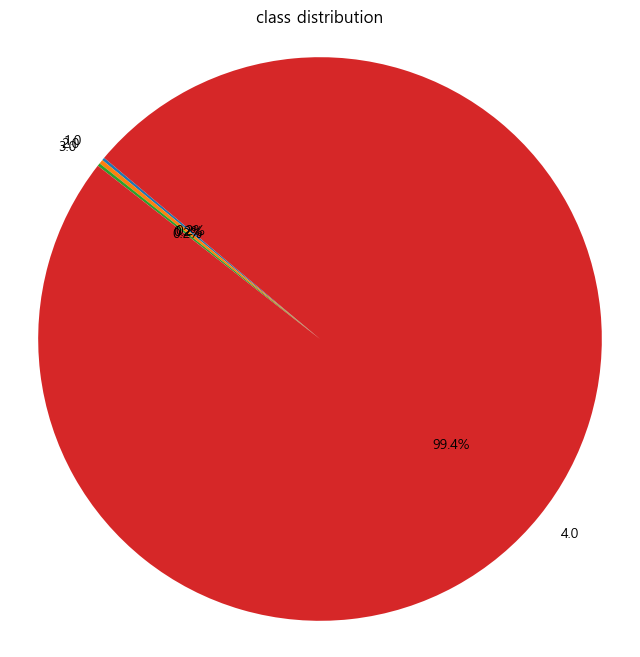

In [23]:
unique_values, counts = np.unique(knn_valid_pred, return_counts = True)

labels = unique_values
sizes = counts

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 그림 크기 설정
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # 파이 차트 그리기
plt.axis('equal')  # 파이 차트를 원형으로 보이도록 설정
plt.title('class distribution')  # 차트 제목 설정
plt.show() 

- confusion matrix

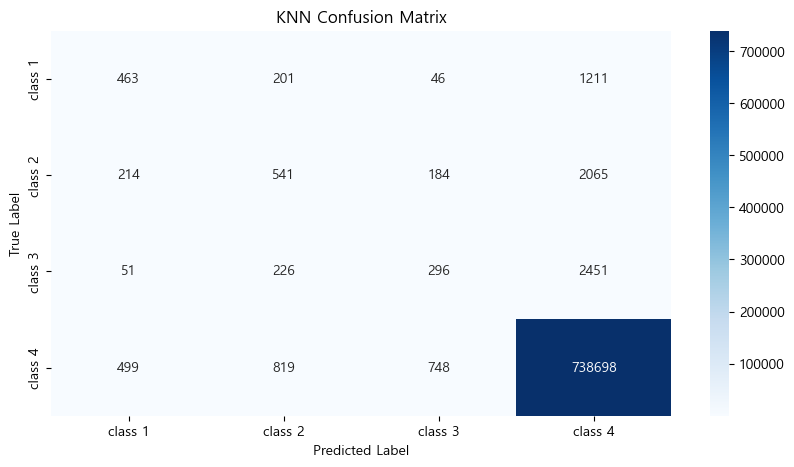

In [24]:
plt.figure(figsize=(10,5))

unique_value = np.unique(knn_valid_pred, return_counts = False)
unique_value_list = []
for i, value in enumerate(unique_value):
    unique_value_list.append("class " + str(int(value)))

knn_cm = confusion_matrix(y_valid, knn_valid_pred)
pred_labels = unique_value_list
sns.heatmap(knn_cm, 
            annot=True, 
            fmt="d", 
            cmap="Blues", 
            xticklabels = pred_labels, 
            yticklabels = pred_labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- CSI index

In [25]:
knn_cm

array([[   463,    201,     46,   1211],
       [   214,    541,    184,   2065],
       [    51,    226,    296,   2451],
       [   499,    819,    748, 738698]], dtype=int64)

In [26]:
def csi_index(cm):

     H = (cm[0][0] + cm[1][1] + cm[2][2])
     F = (cm[0][1] + cm[0][2] + 
          cm[1][0] + cm[1][2] + 
          cm[2][0] + cm[2][1] +
          cm[3][0] + cm[3][1] + cm[3][2])
     M = (cm[0][3] + cm[1][3] + cm[2][3])

     knn_csi = H / (H + F + M)
     return knn_csi

In [27]:
csi_index(knn_cm)

0.12980529206190713

#### [KNN] test data prediction

In [28]:
knn_test_pred = knn_best_model.predict(x_test)
class_info(knn_test_pred, "test_set")

[ test_set의 class별 count / ratio ]
----------------------------------------
class 1: 361 / 0.14%
class 2: 659 / 0.26%
class 3: 425 / 0.17%
class 4: 248972 / 99.42%
----------------------------------------
안개 : 1445 / 0.58%


### XGB

In [37]:
y_train_xgb = y_train - 1
y_valid_xgb = y_valid - 1

#### [XGB] modeling

In [38]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]}

xgb = XGBClassifier(objective = 'multi:softprob', num_class = 4)
xgb_model_grid = GridSearchCV(xgb, 
                              param_grid, 
                              n_jobs = -1, 
                              cv = 3, 
                              scoring = custom_scorer)

with tf.device('/GPU:0'):
    xgb_model = xgb_model_grid.fit(x_train, y_train_xgb)

print("최적의 하이퍼 파라미터:", xgb_model.best_params_)

In [ ]:
xgb_best_model = xgb_model.best_estimator_
xgb_valid_pred = xgb_best_model.predict(x_valid)
xgb_accuracy = accuracy_score(y_valid_xgb, xgb_valid_pred)

#xgb_accuracy = xgb_best_model.score(x_valid, y_valid)

print("검증용 데이터셋 정확도:", xgb_accuracy)

In [ ]:
class_info(xgb_valid_pred, "predicted validset")

[ 전체 trainset의 class별 count / ratio ]
----------------------------------------
class 1: 1227 / 0.16%
class 2: 1787 / 0.24%
class 3: 1274 / 0.17%
class 4: 744425 / 99.43%
----------------------------------------
안개 : 4288 / 0.57%


In [ ]:
print("Classification Report:")
print(classification_report(y_valid_xgb, xgb_valid_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.24      0.29      1921
         2.0       0.30      0.18      0.23      3004
         3.0       0.23      0.10      0.14      3024
         4.0       0.99      1.00      0.99    740764

    accuracy                           0.99    748713
   macro avg       0.48      0.38      0.41    748713
weighted avg       0.98      0.99      0.99    748713



#### [XGB] evaluation

- pie plot

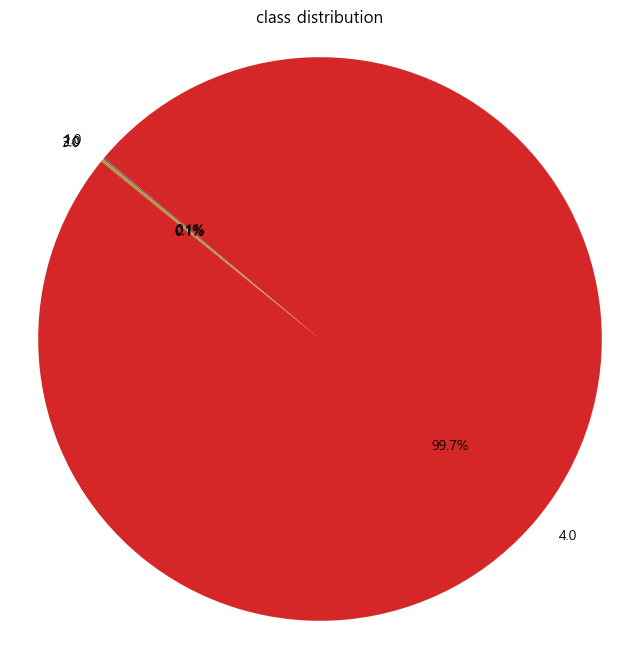

In [ ]:
labels = unique_values
sizes = counts

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 그림 크기 설정
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # 파이 차트 그리기
plt.axis('equal')  # 파이 차트를 원형으로 보이도록 설정
plt.title('class distribution')  # 차트 제목 설정
plt.show() 

- confusion matrix

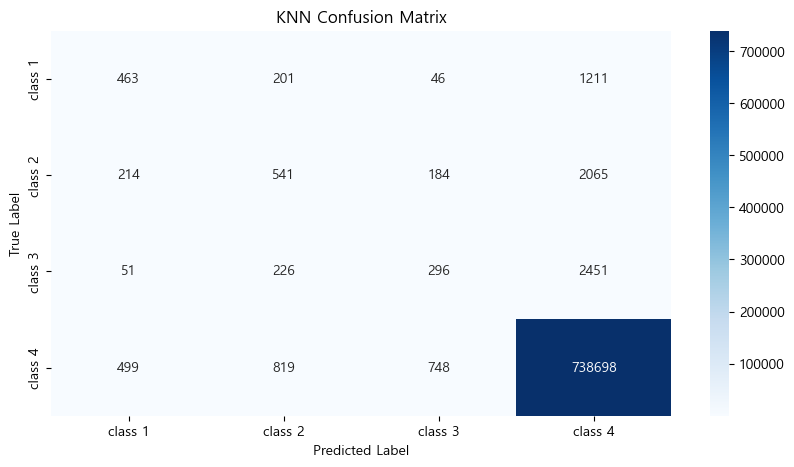

In [ ]:
plt.figure(figsize=(10,5))

unique_value = np.unique(xgb_valid_pred, return_counts = False)
unique_value_list = []
for i, value in enumerate(unique_value):
    unique_value_list.append("class " + str(int(value)))

xgb_cm = confusion_matrix(y_valid_xgb, xgb_valid_pred)
pred_labels = unique_value_list
sns.heatmap(xgb_cm, 
            annot=True, 
            fmt="d", 
            cmap="Blues", 
            xticklabels = pred_labels, 
            yticklabels = pred_labels)
plt.title('XGB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- CSI index

In [ ]:
xgb_cm

array([[   463,    201,     46,   1211],
       [   214,    541,    184,   2065],
       [    51,    226,    296,   2451],
       [   499,    819,    748, 738698]], dtype=int64)

In [ ]:
def csi_index(cm):

     H = (cm[0][0] + cm[1][1] + cm[2][2])
     F = (cm[0][1] + cm[0][2] + 
          cm[1][0] + cm[1][2] + 
          cm[2][0] + cm[2][1] +
          cm[3][0] + cm[3][1] + cm[3][2])
     M = (cm[0][3] + cm[1][3] + cm[2][3])

     csi = H / (H + F + M)
     return csi

In [ ]:
csi_index(xgb_cm)

0.12980529206190713

#### [XGB] test data prediction

In [ ]:
xgb_test_pred = xgb_best_model.predict(x_test)
class_info(xgb_test_pred, "test_set")

[ test_set의 class별 count / ratio ]
----------------------------------------
class 1: 103 / 0.04%
class 2: 349 / 0.14%
class 3: 104 / 0.04%
class 4: 249861 / 99.78%
----------------------------------------
안개 : 556 / 0.22%


### SVM

#### [SVM] modeling

In [160]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']}

svm = SVC()
svm_model_grid = GridSearchCV(svm, 
                              param_grid, 
                              n_jobs = -1, 
                              cv = 5,
                              scoring = custom_scorer)

with tf.device('/GPU:0'):
    svm_model = svm_model_grid.fit(x_train, y_train)

print("최적의 하이퍼 파라미터:", svm_model.best_params_)

In [ ]:
svm_best_model = svm_model.best_estimator_
svm_valid_pred = svm_best_model.predict(x_valid)
svm_accuracy = accuracy_score(y_valid, svm_valid_pred)

#svm_accuracy = svm_best_model.score(x_valid, y_valid)

print("검증용 데이터셋 정확도:", svm_accuracy)

In [ ]:
class_info(svm_valid_pred, "predicted validset")

In [ ]:
print("Classification Report:")
print(classification_report(y_valid, svm_valid_pred))

#### [SVM] evaluation

- pie plot

In [ ]:
unique_values, counts = np.unique(svm_valid_pred, return_counts = True)

labels = unique_values
sizes = counts

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 그림 크기 설정
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # 파이 차트 그리기
plt.axis('equal')  # 파이 차트를 원형으로 보이도록 설정
plt.title('class distribution')  # 차트 제목 설정
plt.show() 

- confusion matrix

In [ ]:
plt.figure(figsize=(10,5))

unique_value = np.unique(svm_valid_pred, return_counts = False)
unique_value_list = []
for i, value in enumerate(unique_value):
    unique_value_list.append("class " + str(int(value)))

svm_cm = confusion_matrix(y_valid, svm_valid_pred)
pred_labels = unique_value_list
sns.heatmap(svm_cm, 
            annot=True, 
            fmt="d", 
            cmap="Blues", 
            xticklabels = pred_labels, 
            yticklabels = pred_labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- CSI index

In [ ]:
svm_cm

In [ ]:
csi_index(svm_cm)

#### [SVM] test data prediction

In [ ]:
svm_test_pred = svm_best_model.predict(x_test)
class_info(svm_test_pred, "test_set")

In [43]:
with open('dt_all_data.pkl', 'wb') as file:
  pickle.dump(dt_model, file)

with open('xgb_all_data.pkl', 'wb') as file:
  pickle.dump(xgb_model, file)

with open('lgb_all_data.pkl', 'wb') as file:
  pickle.dump(lgb_model, file)

with open('cat_all_data.pkl', 'wb') as file:
  pickle.dump(cat_model, file)

In [34]:
sorted_y_valid = y_valid.sort_values()
sorted_knn_pred = np.sort(knn_valid_pred)

comp_result = pd.DataFrame({
    'y_valid' : sorted_y_valid,
    'xgb_predict' : sorted_knn_pred
})

comp_result = comp_result.reset_index(drop = True)
comp_result

,y_valid,xgb_predict
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
748708,4.0,4.0
748709,4.0,4.0
748710,4.0,4.0
748711,4.0,4.0


In [35]:
comp_result.describe()

,y_valid,xgb_predict
count,748713.000000,748713.000000
mean,3.980239,3.987644
std,0.206855,0.174822
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,4.000000,4.000000
max,4.000000,4.000000
